In [19]:
""" 와인 데이터 정리 """
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


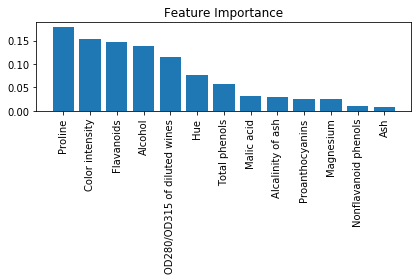

In [20]:
""" 랜덤 포레스트로 특성 중요도 확인 """
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

#indices = np.argsort(importances[::-1])
indices = (np.array(importances)).argsort()[::-1]
# argsort() : 작은 수부터 나타나도록 정렬하는 함수
# 값이 이상하여 코드를 수정함.

for f in range(X_train.shape[1]) :
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
# 막대 그래프
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
# 틱 라벨 설정
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# 결과값은 상대적인 중요도로, 특성 중요도는 정규화된 값이다.

In [21]:
print('예제와는 다르게 랜덤 포레스트의 특성 중요도와 KNN의 순차적 특성 선택 알고리즘의 결과가 다르다.')

예제와는 다르게 랜덤 포레스트의 특성 중요도와 KNN의 순차적 특성 선택 알고리즘의 결과가 다르다.


In [22]:
""" SelectFromModel으로 특성 선택하기 """
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
# 지정한 임계값을 기반으로 특성을 선택한다.
# 단, 모델 훈련이 끝난 후 사용이 가능하다.
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수 :', X_selected.shape[1])

for f in range(X_selected.shape[1]) :
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

이 임계 조건을 만족하는 샘플의 수 : 5
 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
